# Project Causality: Demo

__Content Author__: Kai Chen

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from minfo.mi_float import tdmi_omp as TDMI
from scipy.stats import uniform, norm
from scipy.signal import butter, sosfiltfilt
plt.rcParams['font.size']=16

help(TDMI)

Help on built-in function tdmi_omp in module minfo.mi_float:

tdmi_omp(...)
    Time-delayed Mutual information estimator (OpenMP accelerated version)
    
    Args:
        vec1 (np.ndarray): first time series
        vec2 (np.ndarray): second time series
        n (int): number of delay steps. Delay starts with 0.
    
    Returns:
        np.ndarray: time-delayed mutual information array



## Generate correlated Gaussian process, and perform filtering

In [2]:

L = 50000
t = np.arange(L)/L
x = uniform.rvs(size=(L,))
y = uniform.rvs(size=(L,)) +.1*np.hstack((np.zeros(5), x[:-5]))


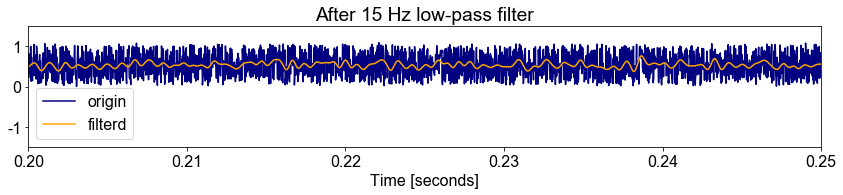

In [3]:
# create filter parameters
sos = butter(5, 30, 'lp', fs=1000, output='sos')
filtered = sosfiltfilt(sos, y)

# draw filtered signals
fig, ax = plt.subplots(1,1,figsize=(12,3))
ax.plot(t, y, color='navy', label='origin')
ax.plot(t, filtered, color='orange', label='filterd')
ax.set_title('After 15 Hz low-pass filter')
ax.axis([0, 1, -1.5, 1.5])
ax.set_xlabel('Time [seconds]')
ax.legend()
ax.set_xlim(0.2,0.25)
plt.tight_layout()
plt.show()

## Calculate mutual information

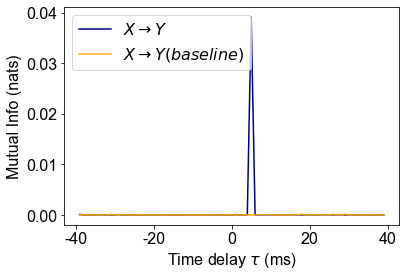

In [4]:
tdmi = TDMI(x, y, 40)
plt.plot(np.arange(tdmi.shape[0]),  tdmi, color='navy', label=r'$X\rightarrow Y$')
tdmi = TDMI(y, x, 40)
plt.plot(-np.arange(tdmi.shape[0]), tdmi, color='navy',)
y_shuffle = y.copy()
np.random.shuffle(y_shuffle)
tdmi = TDMI(x, y_shuffle, 40)
plt.plot(np.arange(tdmi.shape[0]),  tdmi, color='orange', label=r'$X\rightarrow Y (baseline)$')
tdmi = TDMI(y_shuffle, x, 40)
plt.plot(-np.arange(tdmi.shape[0]), tdmi, color='orange',)
plt.xlabel(r'Time delay $\tau$ (ms)')
plt.ylabel(r'Mutual Info (nats)')
plt.legend()

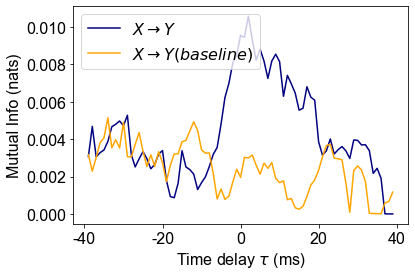

In [5]:
tdmi = TDMI(sosfiltfilt(sos, x), sosfiltfilt(sos,y), 40)
plt.plot(np.arange(tdmi.shape[0]),  tdmi, color='navy', label=r'$X\rightarrow Y$')
tdmi = TDMI(sosfiltfilt(sos, y), sosfiltfilt(sos,x), 40)
plt.plot(-np.arange(tdmi.shape[0]), tdmi, color='navy',)

tdmi = TDMI(sosfiltfilt(sos, x), sosfiltfilt(sos,y_shuffle), 40)
plt.plot(np.arange(tdmi.shape[0]),  tdmi, color='orange', label=r'$X\rightarrow Y (baseline)$')
tdmi = TDMI(sosfiltfilt(sos, y_shuffle), sosfiltfilt(sos,x), 40)
plt.plot(-np.arange(tdmi.shape[0]), tdmi, color='orange',)
plt.xlabel(r'Time delay $\tau$ (ms)')
plt.ylabel(r'Mutual Info (nats)')
plt.legend()